# Дипломная работа по курсу «Python для анализа данных»

1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

## 1.Загрузить файл hr.csv.

In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_profiling import ProfileReport
from scipy import stats as s


In [2]:
url="HR.csv"
data=pd.read_csv(url)
data.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## 2 Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение). 

In [3]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
#Возможно воспользоваться библиотекой pandas_profiling
profile = ProfileReport(data)
profile

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


In [5]:
#или написать функцию для вычисления характеристик
def basic_statistics (stat):
    middle_stat=stat.mean()
    min_stat=min(stat)
    max_stat=max(stat)
    median_stat=statistics.median(stat)
    try:
        moda_stat= statistics.mode(stat)
    except ValueError:
        moda_stat= 'no unique mode'
    mid_dev_stat=statistics.pstdev(stat)
    return print(f'основные статистики: \n среднее значение  {middle_stat} \n минимум {min_stat}\
    \n максимум {max_stat} \n медиана {median_stat} \n мода {moda_stat}\
    \n сред. отклонение {mid_dev_stat}') 

In [6]:
basic_statistics(data.satisfaction_level)

основные статистики: 
 среднее значение  0.6128335222348166 
 минимум 0.09    
 максимум 1.0 
 медиана 0.64 
 мода 0.1    
 сред. отклонение 0.2486223626820733


In [7]:
basic_statistics(data.last_evaluation)

основные статистики: 
 среднее значение  0.7161017401159978 
 минимум 0.36    
 максимум 1.0 
 медиана 0.72 
 мода 0.55    
 сред. отклонение 0.1711634045107436


In [8]:
basic_statistics(data.number_project)

основные статистики: 
 среднее значение  3.80305353690246 
 минимум 2    
 максимум 7 
 медиана 4 
 мода 4    
 сред. отклонение 1.2325512654823438


In [9]:
basic_statistics(data.average_montly_hours)

основные статистики: 
 среднее значение  201.0503366891126 
 минимум 96    
 максимум 310 
 медиана 200 
 мода no unique mode    
 сред. отклонение 49.94143446256218


In [10]:
basic_statistics(data.time_spend_company)

основные статистики: 
 среднее значение  3.498233215547703 
 минимум 2    
 максимум 10 
 медиана 3 
 мода 3    
 сред. отклонение 1.4600875552715114


In [11]:
basic_statistics(data.Work_accident	)

основные статистики: 
 среднее значение  0.1446096406427095 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.3517068274513532


In [12]:
basic_statistics(data.left)

основные статистики: 
 среднее значение  0.2380825388359224 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.42590990072709495


In [13]:
basic_statistics(data.promotion_last_5years)

основные статистики: 
 среднее значение  0.021268084538969265 
 минимум 0    
 максимум 1 
 медиана 0 
 мода 0    
 сред. отклонение 0.14427665479561314


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных. 

In [14]:
#корреляционная матрица
data.corr().style.background_gradient(cmap='PiYG').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.11,-0.14,-0.02,-0.1,0.059,-0.39,0.026
last_evaluation,0.11,1,0.35,0.34,0.13,-0.0071,0.0066,-0.0087
number_project,-0.14,0.35,1,0.42,0.2,-0.0047,0.024,-0.0061
average_montly_hours,-0.02,0.34,0.42,1,0.13,-0.01,0.071,-0.0035
time_spend_company,-0.1,0.13,0.2,0.13,1,0.0021,0.14,0.067
Work_accident,0.059,-0.0071,-0.0047,-0.01,0.0021,1,-0.15,0.039
left,-0.39,0.0066,0.024,0.071,0.14,-0.15,1,-0.062
promotion_last_5years,0.026,-0.0087,-0.0061,-0.0035,0.067,0.039,-0.062,1


Сильные корреляционные зависимости отсутствуют.
Умеренная корреляция наблюдается между:
    среднемесячными рабочими часами и номером проекта (0,42),
    номер проекта и последней оценкой (0,35),
    среднемесячными рабочими часами и последней оценкой (0,34).
Обратная корреляционная связь умеренна между показетялми уход и уровень удволетворенности(-0.39).
Остальные зависимости очень слабые.

## 4.Визуализировать несколько взаимосвязей между переменными. 

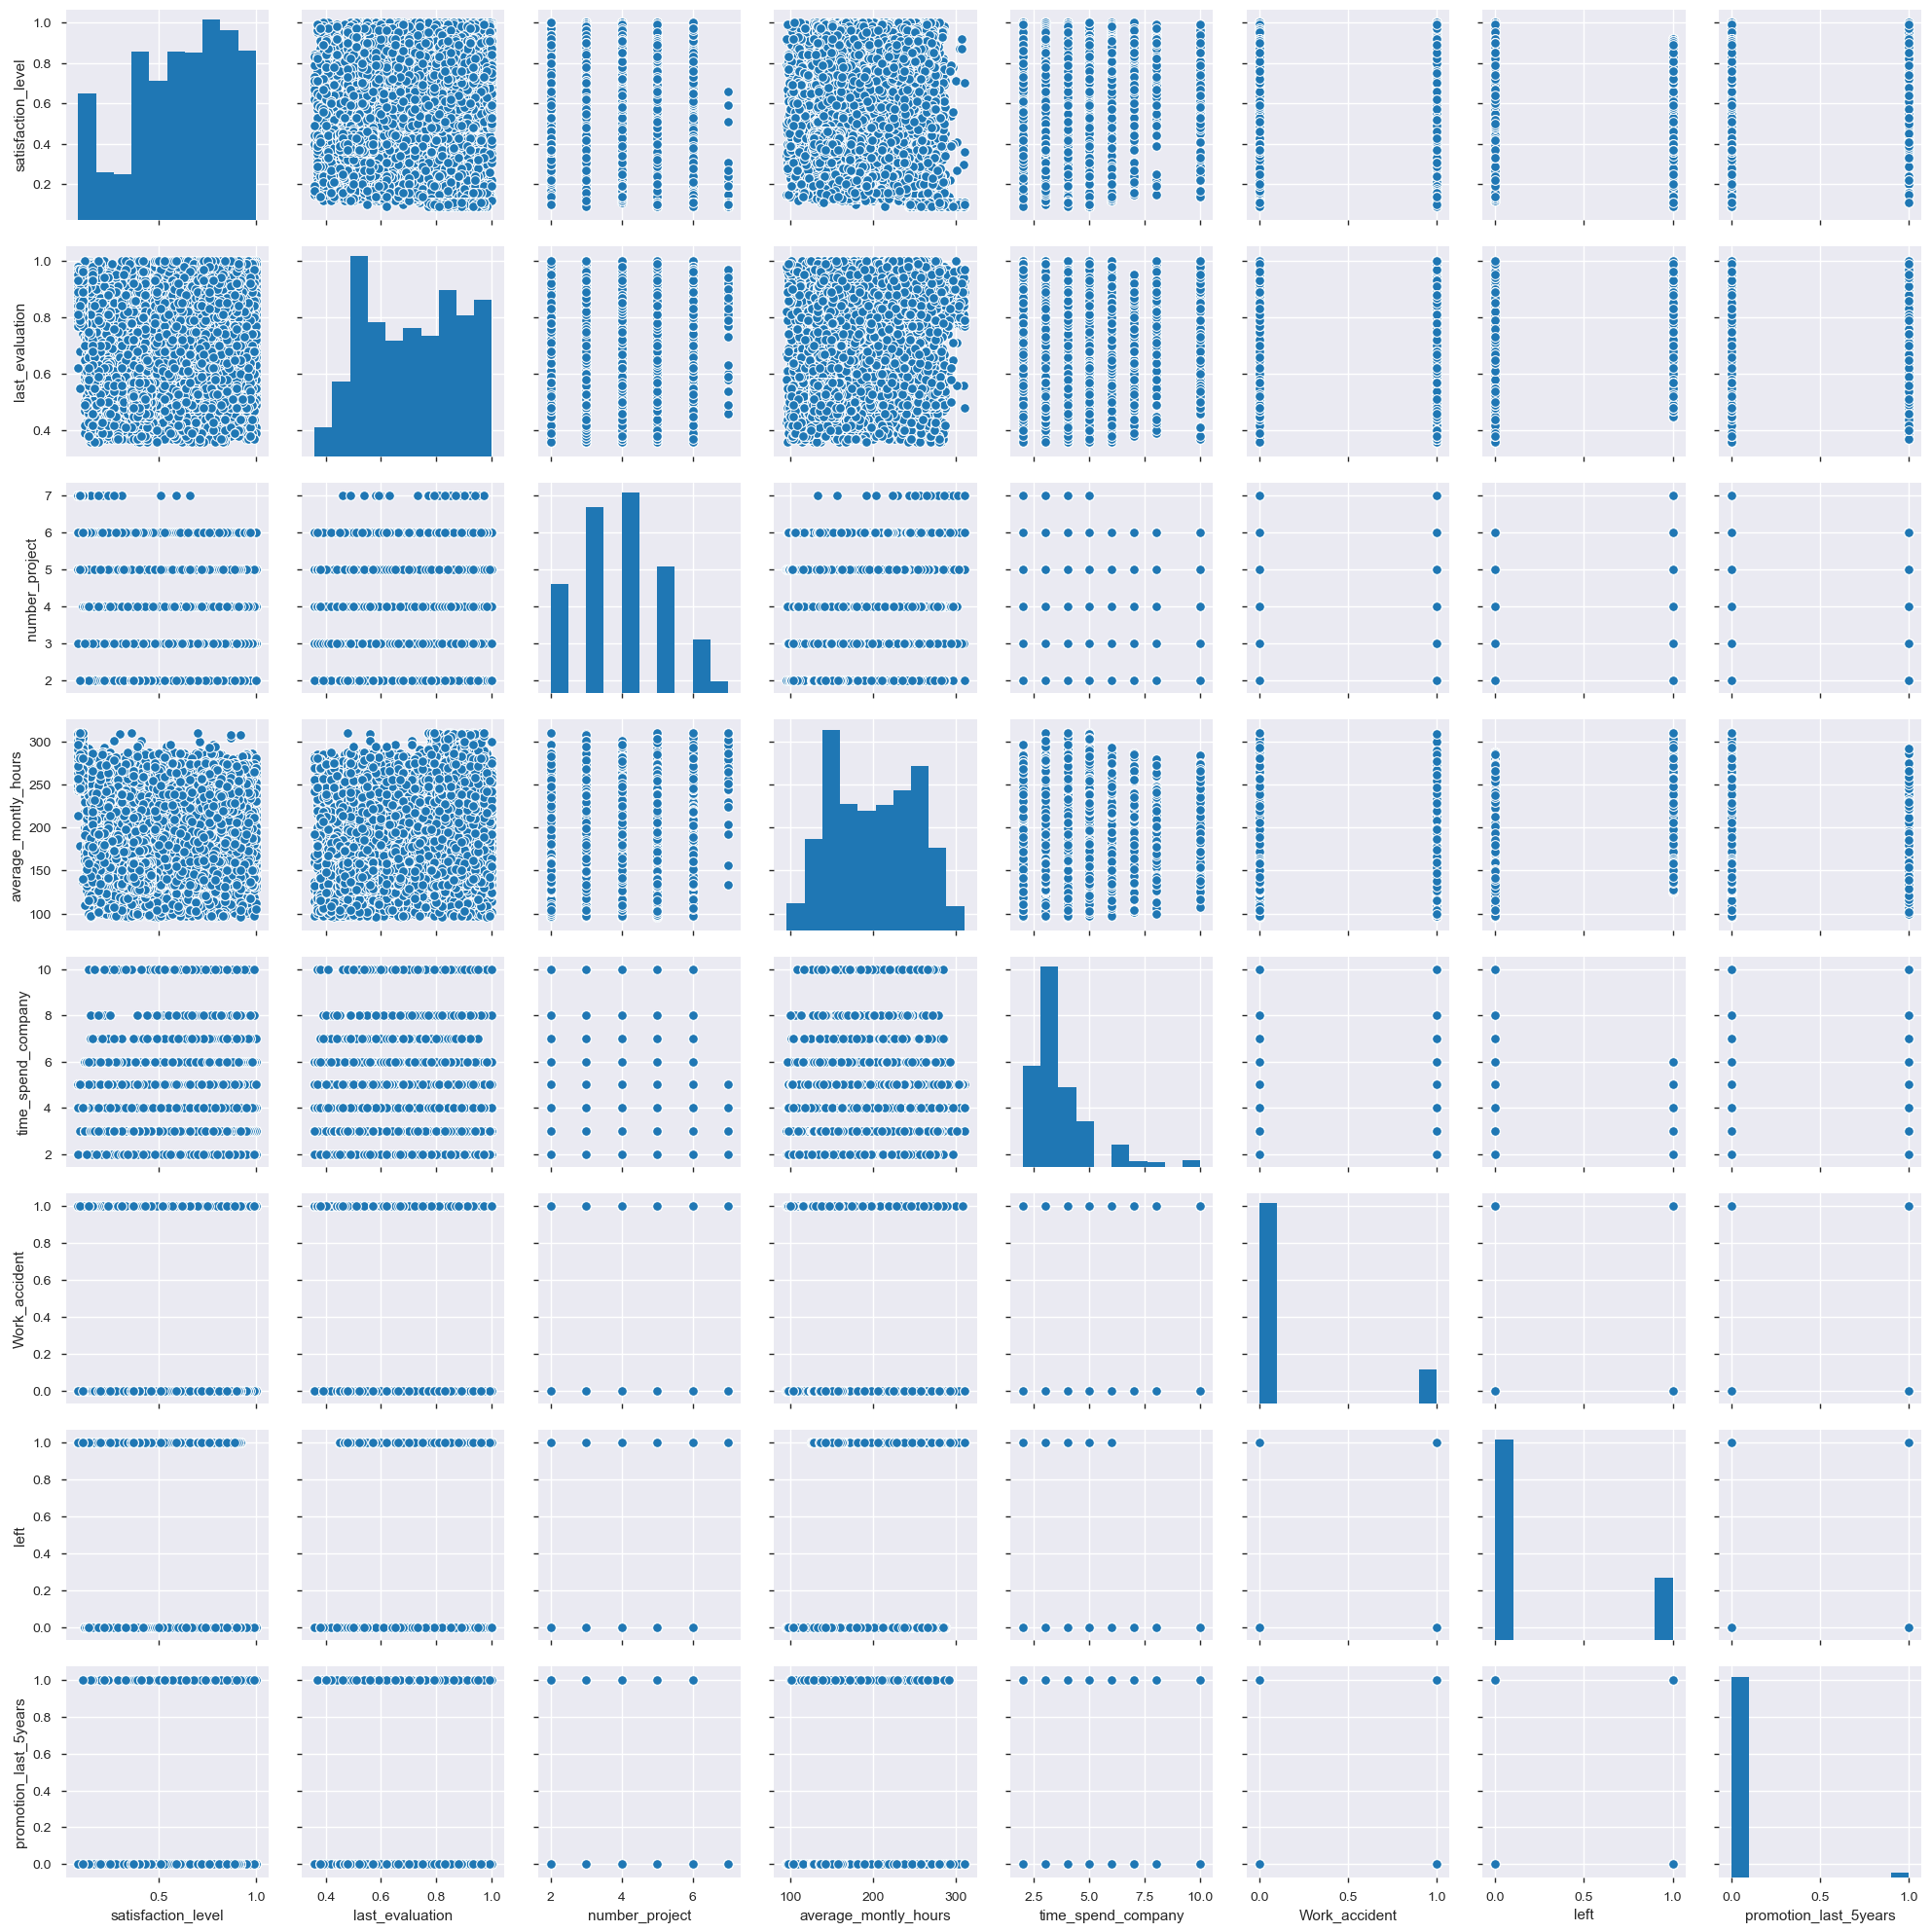

In [15]:
#визуализация через pairplot
g = sns.pairplot(data)

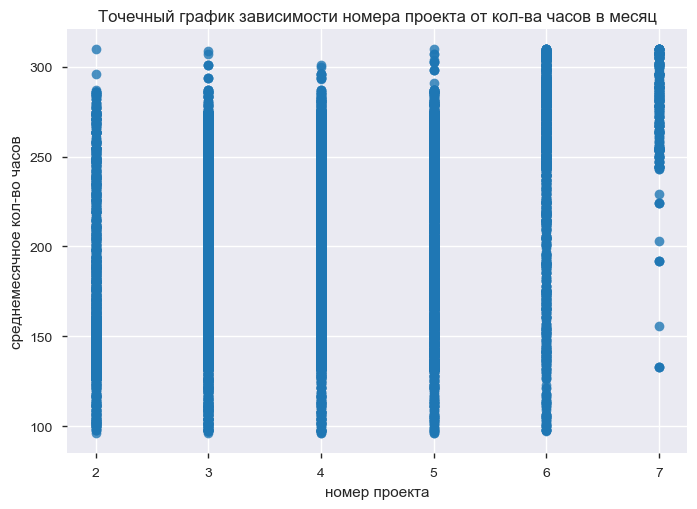

In [387]:
number = data['number_project']
hours = data['average_montly_hours']
sns.regplot(x= number, y=hours, data=data, fit_reg=False)
plt.xlabel('номер проекта')
plt.ylabel('среднемесячное кол-во часов')
plt.title('Точечный график зависимости номера проекта от кол-ва часов в месяц')
plt.show()

График  зависимости номера проекта(кол-во проектов) и кол-во часов в месяц имел умеренную кор.зависимость.\
Заметно резкое отличие  распределения кол-во проектов 7 от остальных. \
У кол-ва проектов 6 плотное распределение от 250 часов.\
На графике заметна схожесть 3 и  5 проектов по часам на первый взгляд, у людей может быть несколько проектов,но они занимают не больше времени,чем у людей с меньшим кол-вом.


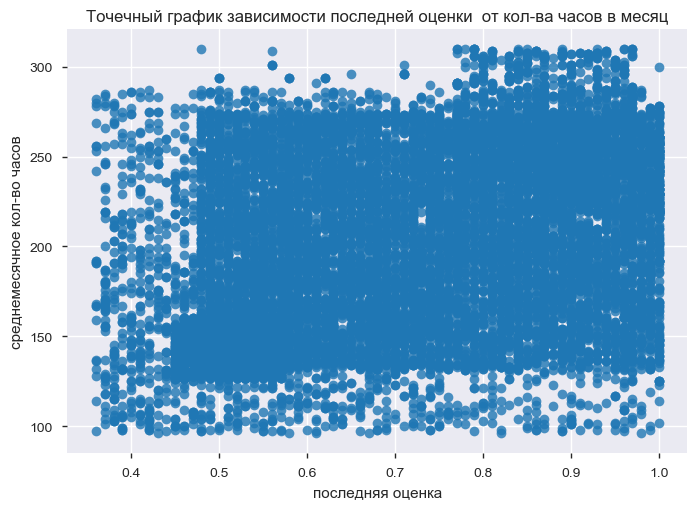

In [398]:
hours = data['average_montly_hours']
last = data['last_evaluation']
sns.regplot(x= last, y=hours, data=data, fit_reg=False)
plt.xlabel('последняя оценка')
plt.ylabel('среднемесячное кол-во часов')
plt.title('Точечный график зависимости последней оценки  от кол-ва часов в месяц')
plt.show()

Имеет умеренная кор.зависимость между показателями. \
На графике видно более плотное распределение ~от 0,5 оценки и от 130 часов до 270. \
Также наблюдается своеобразный выброс у сотрудников с оценкой от 0,8, заметны "переработки"(от 300 часов).


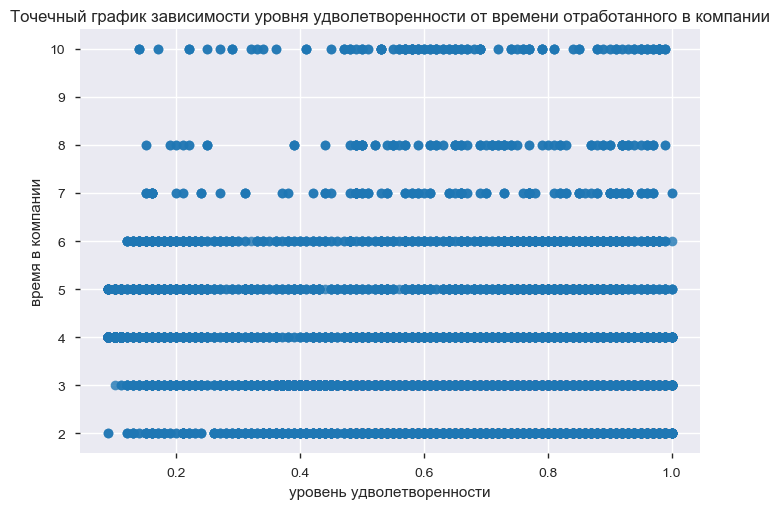

In [216]:
level = data['satisfaction_level']
time = data['time_spend_company']
sns.regplot(x= level, y=time, data=data, fit_reg=False)
plt.xlabel('уровень удволетворенности')
plt.ylabel('время в компании')
plt.title('Точечный график зависимости уровня удволетворенности от времени отработанного в компании')
plt.show()

Корреляционной связи между этими показателями нет(-0.1).\
Наблюдается достаточное равномерное распределение до 7 лет повсем уровням удволетворенности.
от 7 лет есть разрывы в оценка удвоетворенности, наибольшее скопление оценнок от 0.5


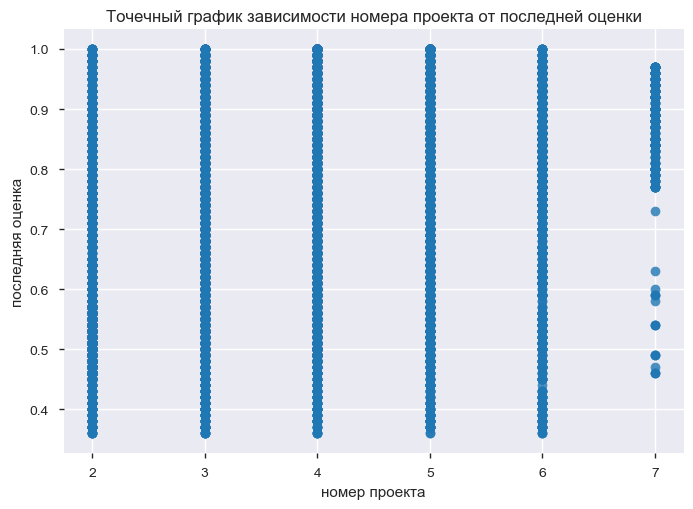

In [403]:
hours = data['average_montly_hours']
last = data['last_evaluation']
sns.regplot(x= number, y=last, data=data, fit_reg=False)
plt.xlabel('номер проекта')
plt.ylabel('последняя оценка')
plt.title('Точечный график зависимости номера проекта от последней оценки')
plt.show()

Имеется умеренная кор.зависимость между показателями. \
Только у сотрудников с кол-вом проектов 7 имеется резкое различие распредления данных. у данных сотрудников их оценка имеет плотное распределение данных от 0,76 , т.е. максимальное кол-во проектов было доверено только сотрудников с высокой оценкой. 


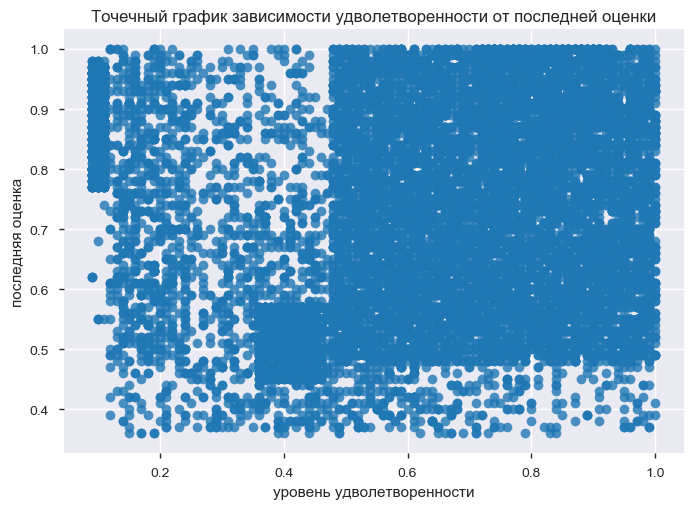

In [219]:
last = data['last_evaluation']
sns.regplot(x= level, y=last, data=data, fit_reg=False)
plt.xlabel('уровень удволетворенности')
plt.ylabel('последняя оценка')
plt.title('Точечный график зависимости удволетворенности от последней оценки')
plt.show()

Заметны 3 сектора скопления данных:\
    уровень удволетворенности менее 0,1 и оценка сотрудника от 0,77 \
    уровень удволетворенности  0,35-0,47 и оценка сотрудника 0,45-0,55 \
    уровень удволетворенности от 0,47 и оценка сотрудника от 0,48

## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Проверка - уровень удволетворенности отдела продаж и маркетинга "идентичен"

In [223]:
sales_sat=data[data.sales=='sales']['satisfaction_level']
marketing_sat=data[data.sales=='marketing']['satisfaction_level']

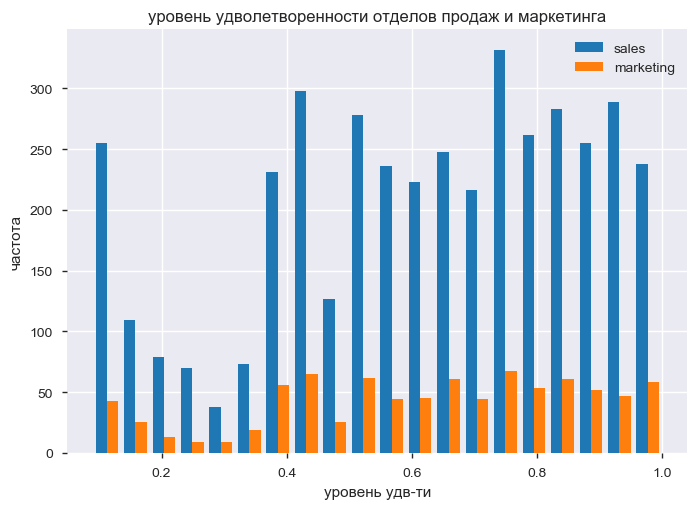

In [224]:
plt.hist([sales_sat, marketing_sat], bins = 20, label=['sales', 'marketing'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности отделов продаж и маркетинга')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [225]:
s.shapiro(sales_sat)

ShapiroResult(statistic=0.9506646990776062, pvalue=3.175028034698379e-35)

In [226]:
s.shapiro(marketing_sat)

ShapiroResult(statistic=0.956967294216156, pvalue=3.622164451244723e-15)

In [227]:
statistics.variance(sales_sat), statistics.variance(marketing_sat)

(0.06262547313582477, 0.05967272074483276)

нет нормального распределния

In [221]:
#Проверка T критерий Стьюдента
s.ttest_ind(sales_sat, marketing_sat, equal_var=False)

Ttest_indResult(statistic=-0.4514854841846845, pvalue=0.6517175047327456)

p=0,65>0,05  следовательно мы принимает нулевую гипотезу (о том, что средние значения выборок равны), следовательно
 не имеется статистического различия между отделом продаж и маркетинга.

In [222]:
#Проверка Манна-Уитни
s.mannwhitneyu(sales_sat,marketing_sat)

MannwhitneyuResult(statistic=1768307.5, pvalue=0.4201381842481898)

данная проверка также показада P=0,4>0,05 -принимает нулевую гипотезу

In [401]:
sales_sat.mean(), marketing_sat.mean()

(0.614446859903383, 0.6186013986013983)

Схожие отделы (в данном случае бизнеса-маркетинг и продажники) при нормальной атмосфере в отделах, как правило, имеют схожий уровень удволетворености и эту удволетворенность определяет внутренняя политика компании.\
Проверка показала, что статистического различия нет, средние значения по уровню удволетворенности почти равны (0,61-выше среднего).

### Проверка взаимосвязи  3 и 5 проектов  по среднемесячному кол-ву часов

In [112]:
project_3=data[(data.number_project==3)]['average_montly_hours']
project_5=data[(data.number_project==5)]['average_montly_hours']

In [113]:
len(project_3),len(project_5)

(4055, 2761)

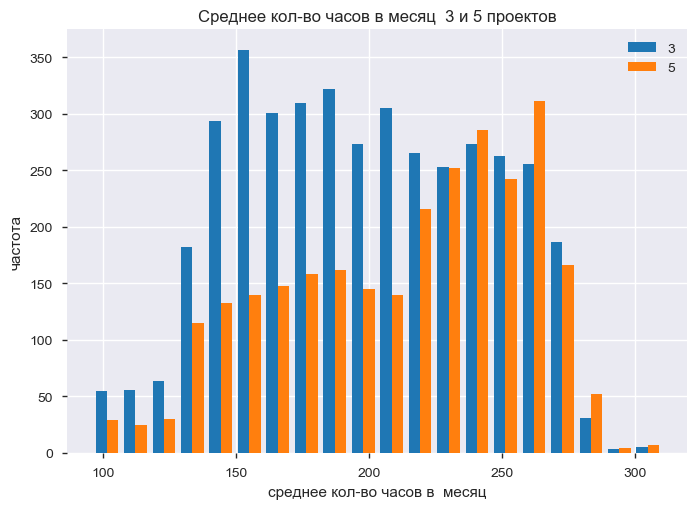

In [121]:
plt.hist([project_3, project_5], bins = 20, label=['3', '5'])
plt.legend(loc='upper right')
plt.title('Среднее кол-во часов в месяц  3 и 5 проектов')
plt.xlabel('среднее кол-во часов в  месяц')
plt.ylabel('частота')
plt.show()

In [115]:
s.shapiro(project_3)

ShapiroResult(statistic=0.9761229753494263, pvalue=1.5234771461491816e-25)

In [116]:
s.shapiro(project_5)

ShapiroResult(statistic=0.9555408358573914, pvalue=3.1113058806423097e-28)

In [117]:
statistics.variance(project_3), statistics.variance(project_5)

(1990.0832561894085, 2065.972294484775)

не нормальное распределение

In [118]:
#Проверка T критерий Стьюдента
s.ttest_ind(project_3,project_5, equal_var=False)

Ttest_indResult(statistic=-13.074973333726632, pvalue=1.5798084960445488e-38)

p<0,05 следовательно мы не принимает нулевую гипотезу (о том, что средние значения выборок равны), следовательно  имеется статистического различия между сотрудниками 3 и 5 проектов по уровню удв.

In [119]:
#Проверка Манна-Уитни
s.mannwhitneyu(project_3,project_5)

MannwhitneyuResult(statistic=4549522.5, pvalue=8.934222744155405e-40)

данная проверка также показада P<0,05 - не принимаем нулевую гипотезу

In [120]:
 basic_statistics (project_3), basic_statistics (project_5)

основные статистики: 
 среднее значение  197.5075215782984 
 минимум 96    
 максимум 309 
 медиана 196 
 мода 183    
 сред. отклонение 44.604848206219046
основные статистики: 
 среднее значение  212.0615718942412 
 минимум 96    
 максимум 310 
 медиана 222 
 мода 257    
 сред. отклонение 45.444735942796854


(None, None)

Распределение (плотность) 3 и 5 проектов на графике от кол-ва часов были схожие. Предположение, что сотрудники одинаково загружены, т.е. 3 проекта столько же занимаем времени как и 5, проверка опровергла.


### Проверка - гипотеза рабочие проработавшие большее кол-во времени в компании более удволетворены

In [199]:
# ho-удволетворены одинаково
time_more6=data[data.time_spend_company>=6]['satisfaction_level']
time_max5=data[data.time_spend_company<6]['satisfaction_level']

In [200]:
s.shapiro(time_more6)

ShapiroResult(statistic=0.9300969243049622, pvalue=5.2848876486894995e-24)

In [201]:
s.shapiro(time_max5)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.952475368976593, pvalue=0.0)

In [202]:
statistics.variance(time_more6), statistics.variance(time_max5)

(0.06439430053548746, 0.0615667335213569)

нет нормального распределения

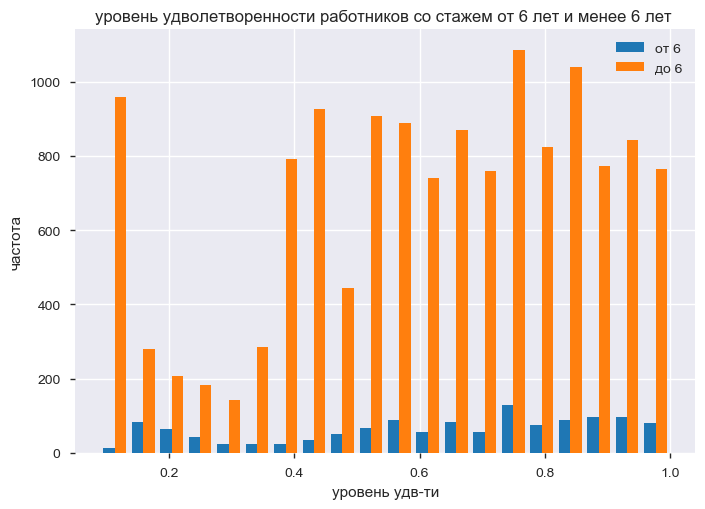

In [203]:
plt.hist([time_more6, time_max5], bins = 20, label=['от 6', 'до 6'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности работников со стажем от 6 лет и менее 6 лет ')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [204]:
#Проверка T критерий Стьюдента
s.ttest_ind(time_more6, time_max5, equal_var=False)

Ttest_indResult(statistic=1.747735789215232, pvalue=0.08071183343338956)

p>0,05 следовательно принимаем нулевую гипотезу-->  имеется статистическое схожесть

In [205]:
s.mannwhitneyu(time_more6,time_max5)

MannwhitneyuResult(statistic=8409572.5, pvalue=0.004887615349060577)

p<0,05 соедовательно отвергаем нулевую гипотезу-->  имеется статистическое различие

In [206]:
len(time_more6), len(time_max5)

(1282, 13717)

In [207]:
 basic_statistics (time_more6), basic_statistics (time_max5)

основные статистики: 
 среднее значение  0.6246567862714514 
 минимум 0.12    
 максимум 1.0 
 медиана 0.665 
 мода 0.77    
 сред. отклонение 0.2536613312507195
основные статистики: 
 среднее значение  0.6117285120653179 
 минимум 0.09    
 максимум 1.0 
 медиана 0.64 
 мода 0.1    
 сред. отклонение 0.2481174019868231


(None, None)

Оптимальный срок работы на одном месте — от 3 до 5 лет. Если человек работает дольше, у него наступает застой,пропадает азарт. \
Проверка уровня удволетворенности двух групп (до 6 лет стад и от 6 лет) показала, что критери Манна Уитни и критерий Стьюдента имеют  разные результаты. \
Считается, что первый критерий более устойчив к выбросам. По Гистограмме виден выброс сотрудников с удволетворенностью менее 0,1 , проработавших меньше 6 лет.\
По визуализации проведенной ранее заметно,что клиенты с уровнем удволетворенности меньше 0,1 имеют высокую оценку уровня сотрудников от ~0,8 и среднее кол-во часов в месяц от 250 часов, возможно хорошие сотрудники были перегружены работой.
До выявления реальных причин выброса и возможности исключения, считаем что выборки имеют статистическое различие по критерию Манна Уитни.

### Проверка - сотрудники с высокой зп более утволетворены,чем сотрудники с низкой зп.

In [106]:
# ho-удволетворены одинаково
l_salary=data[data.salary=='low' ]['satisfaction_level']
h_salary=data[data.salary=='high']['satisfaction_level']

In [107]:
s.shapiro(h_salary)

ShapiroResult(statistic=0.9594685435295105, pvalue=4.769292214999549e-18)

In [108]:
s.shapiro(l_salary)

ShapiroResult(statistic=0.9503720998764038, pvalue=3.0828566215145976e-44)

In [109]:
statistics.variance(time_more3), statistics.variance(time_max3)

(0.06439430053548746, 0.0615667335213569)

нет нормального распределения

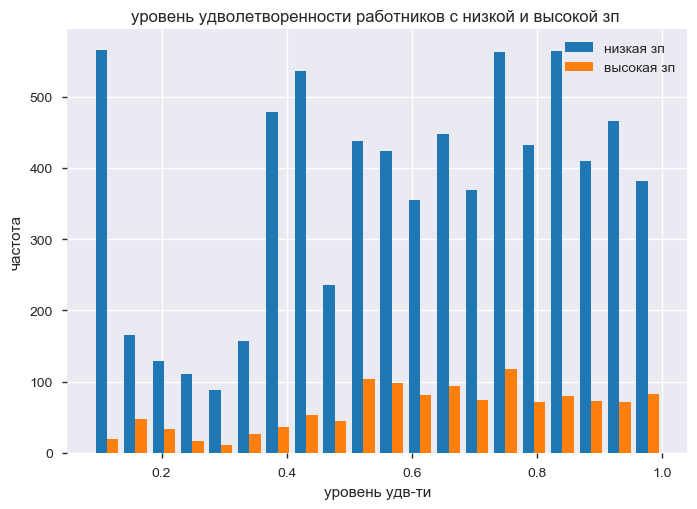

In [110]:
plt.hist([l_salary, h_salary], bins = 20, label=['низкая зп', 'высокая зп'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности работников с низкой и высокой зп ')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [82]:
#Проверка T критерий Стьюдента
s.ttest_ind(h_salary, l_salary, equal_var=False)

Ttest_indResult(statistic=-5.169825258002304, pvalue=2.603101151737067e-07)

p<0,05 следовательно отвергаем нулевую гипотезу--> имеется статистическое различие

In [92]:
s.mannwhitneyu(l_salary,h_salary)

MannwhitneyuResult(statistic=4187327.0, pvalue=1.3117365702204594e-05)

p<0,05 следовательно отвергаем нулевую гипотезу--> имеется статистическое различие

In [94]:
l_salary.mean(), h_salary.mean()

(0.6007531437944199, 0.6374696847211003)

In [95]:
 basic_statistics (l_salary), basic_statistics (h_salary)

основные статистики: 
 среднее значение  0.6007531437944199 
 минимум 0.09    
 максимум 1.0 
 медиана 0.63 
 мода 0.11    
 сред. отклонение 0.2545763615547429
основные статистики: 
 среднее значение  0.6374696847211003 
 минимум 0.09    
 максимум 1.0 
 медиана 0.66 
 мода 0.5    
 сред. отклонение 0.22669959915361182


(None, None)

Сотрудники с высокой и низкой зп  имеют статистическое различие. Уровень удволетворенности различен, резкое отличие в моде у выборок (низкая зп 0,11 ,высокая зп 0,5), среднее значение у сотрудников с высокой зп немного выше. \
Можно в целом сказать ,что уровень зп влияет на удволетворенность сотрудников в лучшую сторону.


## 6.Рассчитать сколько работников работает в каждом департаменте.

In [81]:
#сколько работников работает в каждом департаменте 
data['sales'].groupby(data['sales']).count().sort_values( ascending=False)

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Наибольшее кол-во сотрудников работает в отделах: продаж, техники, поддержка.\
Наименьшее кол-во сотрудников в менеджменте.

## 7.Показать распределение сотрудников по зарплатам.

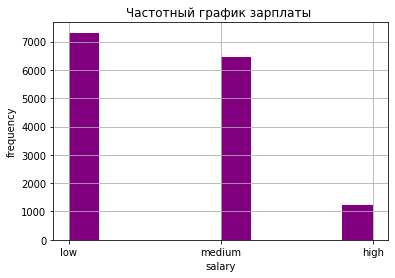

In [131]:
#распределение сотрудников по зарплатам
n, bins, patches = plt.hist(data['salary'], 10, facecolor='purple')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('Частотный график зарплаты ')
plt.grid(True)
plt.show()


Наибольшее кол-во сотрудников работает с низкой заработной платой (более 7000), более 6 тыс со средней зп и высокой зп всего около 1100 сотрудников.

## 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [125]:
f=data.pivot_table(index='sales', columns='salary',  aggfunc='size', fill_value=0)
f

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


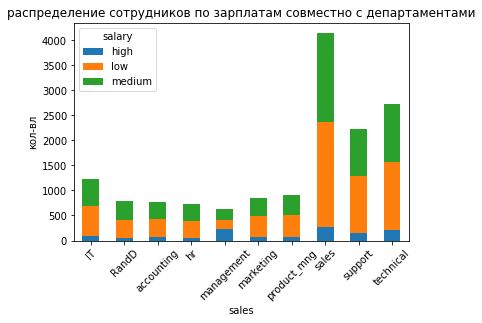

In [128]:
f.plot(kind='bar', rot=45, stacked=True)
plt.title('распределение сотрудников по зарплатам совместно с департаментами')
plt.ylabel('кол-вл')
plt.show()

По пропорциям заметно , что кол-во сотрудников с высокой зп у менеджемента занимает около трети сотрудников(наибольший процент высого зп в отделе), при этом менеджмент имеет наименьшее число сотрудников по сравнению с другими отделами.\
Наибольшее кол-во сотрудников в продажах(как было и выявлено раньше),  по пропорциям  уровня зп мало отличается от остальных отделов(кроме менеджмента).

## 9.Сколько сотрудников покинули компанию. 

In [8]:
# 9.Сколько сотрудников покинули компанию.
data[data.left==1].left.count()

3571

In [10]:
len(data[data.left==1].left)

3571

3,6 тыс сотрудников покунили компанию из 15 тыс(~24%)

## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

### Гипотеза №1  -уровень  зарплаты влияет на "увольнение"

In [141]:
g1=data.pivot_table(index='left', columns='salary',  aggfunc='size', fill_value=0)
g1

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


In [144]:
# Применим хи2 квадрат Пирсона (обе переменные номинативные)
import scipy
chi2, prob, df, expected = scipy.stats.chi2_contingency(g1)

In [148]:
chi2

381.2250470662106

In [150]:
prob

1.652086749296005e-83

Теоритеческое значение хи2 при степени свободы 2=(3-1)*(2-1)  при р=0,05 составляет 5,991 и при р=0,01 - 9,210

381>9,210
Следовательно уровень зарплата влияет на увольнение работников.

### Гипотеза №2 - несчатсный случай влияет на увольнение работников

In [185]:
g2=data.pivot_table(index='left', columns='Work_accident',  aggfunc='size', fill_value=0)
g2

Work_accident,0,1
left,,
0,9428,2000
1,3402,169


In [188]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(g2)

In [153]:
chi2

357.5623604097228

In [154]:
prob

9.55823958002199e-80

Теоритеческое значение хи2 при степени свободы 1=(2-1)*(2-1)  при р=0,05 составляет 3,841 и при р=0,01 - 6,635.

358>6,6 и p=9,6e-80<0,01
Следовательно несчатный случай на работе влияет на увольнение работников.

### Гипотеза №3-отсутствие повышений за 5 лет -влияет на увольнение

In [189]:
g3=data.pivot_table(index='left', columns='promotion_last_5years',  aggfunc='size', fill_value=0)
g3


promotion_last_5years,0,1
left,,
0,11128,300
1,3552,19


In [169]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(g3)

In [170]:
chi2

56.26162726484021

In [171]:
prob

6.344155457918697e-14

Теоритеческое значение хи2 при степени свободы 1=(2-1)*(2-1)  при р=0,05 составляет 3,841 и при р=0,01 - 6,635

56>6,6 и p=6e-14<0,01
Следовательно отсутствие/присутствие повышений влияет на увольнение работников.

### Гипотеза №4 -уровень удволетворенности влияет на увольнение

In [391]:
left_sap=data[data.left==1].satisfaction_level
notleft_sap=data[data.left==0].satisfaction_level

In [175]:
# проверим на нормальное распределение
s.shapiro(left_sap),s.shapiro(notleft_sap)

(ShapiroResult(statistic=0.8881876468658447, pvalue=4.203895392974451e-45),
 ShapiroResult(statistic=0.9537106156349182, pvalue=0.0))

In [176]:
statistics.variance(left_sap), statistics.variance(notleft_sap)

(0.06966085873834273, 0.047134040226558455)

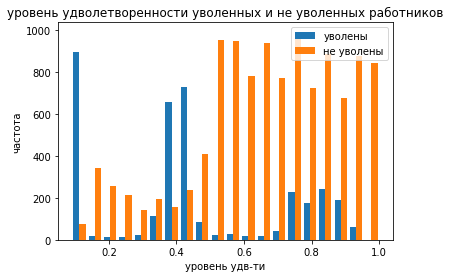

In [177]:
plt.hist([left_sap, notleft_sap], bins = 20, label=['уволены', 'не уволены'])
plt.legend(loc='upper right')
plt.title('уровень удволетворенности уволенных и не уволенных работников')
plt.xlabel('уровень удв-ти')
plt.ylabel('частота')
plt.show()

In [192]:
# распределение не нормальное,применим U критерий Манна уитни
s.mannwhitneyu(left_sap, notleft_sap)

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

P=0<0,05 следовательно отвергаем нулевую гипотезу. 
Наблюдается статистическое различие между уволенными
и не уволенными сотрудниками по показателю уровня удволетворенности.

In [196]:
left_sap.mean(), notleft_sap.mean()

(0.44009801176140917, 0.666809590479516)

In [390]:
#Проверка T критерий Стьюдента
s.ttest_ind(left_sap, notleft_sap, equal_var=False)

Ttest_indResult(statistic=-46.63641435277572, pvalue=0.0)

P=0<0,05 следовательно отвергаем нулевую гипотезу. Наблюдается статистическое различие между уволенными и не уволенными сотрудниками по показателю уровня удволетворенности.

# 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

# Задание 9 из новой дипломной для тренировки

Разделить данные на тестовую и обучающую выборки \
Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)\
Оценить качество модели на тестовой выборки

In [136]:
#берем данные без столбцов department и salary
new_data=data.iloc[:,:-2]
new_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [138]:
# Разделим данные на 80% тренировочных, 20% тестовых
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(new_data, test_size=0.2)

In [139]:
#тренировочные данные
data_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
9517,0.95,0.87,3,201,3,0,0,0
2468,0.91,0.76,5,152,3,0,0,0
6876,0.79,0.84,4,144,2,1,0,0
582,0.74,0.87,5,242,5,0,1,0
3529,0.57,0.92,6,267,4,0,0,0
...,...,...,...,...,...,...,...,...
4521,0.54,0.76,3,199,4,0,0,0
1157,0.42,0.52,2,141,3,1,1,0
11535,0.57,0.66,3,268,3,0,0,0
8733,0.74,0.58,3,220,2,0,0,0


In [140]:
#тестовые данные
data_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
6310,0.67,0.54,3,213,4,0,0,0
10921,0.55,0.98,4,185,2,1,0,0
5264,0.93,0.77,5,224,2,0,0,0
12441,0.36,0.78,2,151,4,0,1,0
3609,0.95,0.71,3,263,2,1,0,0
...,...,...,...,...,...,...,...,...
4013,0.66,0.92,4,229,2,0,0,0
9259,0.81,0.75,4,243,2,0,0,0
5258,0.66,0.60,3,262,2,1,0,0
2042,0.71,0.92,3,202,4,0,0,0


In [141]:
y_train, y_test = data_train['left'], data_test['left']
del data_train['left']
del data_test['left']

In [142]:
data_train


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
9517,0.95,0.87,3,201,3,0,0
2468,0.91,0.76,5,152,3,0,0
6876,0.79,0.84,4,144,2,1,0
582,0.74,0.87,5,242,5,0,0
3529,0.57,0.92,6,267,4,0,0
...,...,...,...,...,...,...,...
4521,0.54,0.76,3,199,4,0,0
1157,0.42,0.52,2,141,3,1,0
11535,0.57,0.66,3,268,3,0,0
8733,0.74,0.58,3,220,2,0,0


In [143]:
#построим модель
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [144]:
lda = LinearDiscriminantAnalysis()

In [145]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [146]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
# сравним результаты тестовых и предсказанных данных
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [148]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [149]:
#коэффициенты дискриминантных линий
lda.coef_

array([[-4.46248283e+00,  7.38119286e-01, -2.38736418e-01,
         4.10082645e-03,  2.33079272e-01, -1.07789558e+00,
        -1.12966022e+00]])

In [181]:
# оценим способность модели предсказывать результат
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(data_test))


0.7626666666666667

на 76% модель предсказывает результат